In [1]:
import os
os.chdir('..')

In [2]:
from fox.config import Config, PlaneRCNNConfig
from fox.dataset import ComboDataset, PlaneRCNNDataset, MidasDataset
from fox.yolov3.utils.utils import plot_images, load_classes
from fox.utils import parse_data_cfg
import matplotlib.pyplot as plt
import torch
import cv2

In [29]:
##MOdified Code for train,test DOOOOOOOOONOT RUN
os.curdir
import pandas as pd  
fixed_train = []
fixed_train_shape = []
df = pd.read_csv('data\\yolo\\test_2.txt', delimiter = "\t",header = None)
df_1 = pd.read_csv('data\\yolo\\test.shapes', delimiter = "\t",header = None)
for img,shapesss in zip(df[0],df_1[0]):
    split_name = os.path.splitext(img.replace("../images/",""))[0]
    ##Check for Planner data 
    #print(os.path.join("data\\planercnn\\masks\\",split_name + "_masks.png"))
    mask_path = os.path.exists(os.path.join("data\\planercnn\\masks\\",split_name + "_masks.png"))
    para_path = os.path.exists(os.path.join("data\\planercnn\\parameters\\",split_name + "_parameters.npy"))
    if mask_path and para_path:
        fixed_train.append(img)
        fixed_train_shape.append(shapesss)


In [30]:
with open("test.txt", "w") as outfile:
    outfile.write("\n".join(fixed_train))
with open("test.shapes", "w") as outfile:
    outfile.write("\n".join(fixed_train_shape))

In [8]:
df.head()

0
0  ../images/img_001.jpg
1  ../images/img_002.jpg
2  ../images/img_003.jpg
3  ../images/img_004.jpg
4  ../images/img_005.jpg

# Combo Dataset

In [3]:
d = ComboDataset(Config(DATA_DIR="data"))
loader = torch.utils.data.DataLoader(d, batch_size=2, shuffle=True, collate_fn=d.collate_fn)
stuff = next(iter(loader))

val_d = ComboDataset(Config(DATA_DIR="data"), train=False)
val_loader = torch.utils.data.DataLoader(val_d, batch_size=16, collate_fn=d.collate_fn)
val_stuff = next(iter(val_loader))

Caching labels data\yolo\labels.npy (1001 found, 0 missing, 14 empty, 0 duplicate, for 1015 images): 100%|██████████| 1015/1015 [00:00<00:00, 17203.87it/s]
Caching labels data\yolo\labels.npy (99 found, 0 missing, 0 empty, 0 duplicate, for 99 images): 100%|██████████| 99/99 [00:00<00:00, 4304.44it/s]


In [4]:
val_imgs, _, val_yolo_data, _ = val_stuff
val_yolo_imgs, val_targets, val_paths, val_shapes, val_pad = val_yolo_data
data = parse_data_cfg("data/yolo/custom.data")
classes = load_classes(data["names"])

In [5]:
val_paths

('data\\images\\SImage_106.jpg',
 'data\\images\\C13.jpg',
 'data\\images\\R46.jpg',
 'data\\images\\Jimg032.jpg',
 'data\\images\\ss_34.jpg',
 'data\\images\\R65.jpg',
 'data\\images\\Mimg_020.jpg',
 'data\\images\\Jimg055.jpg',
 'data\\images\\a11.jpg',
 'data\\images\\ImageYolo (33).jpg',
 'data\\images\\images13.jpg',
 'data\\images\\majdoor_141.jpg',
 'data\\images\\hispanic-worker-outside-with-hardhat-and-safety-vest-picture-id1145095003.jpg',
 'data\\images\\E67.jpg',
 'data\\images\\Jimg089.jpg',
 'data\\images\\images (41).jpg')

In [16]:
yolo_imgs, targets, paths, shapes, pad = yolo_data
data = parse_data_cfg("data/yolo/custom.data")
classes = load_classes(data["names"])

In [17]:
fname = "data/yolo_test.jpg"
if os.path.exists(fname):
    os.remove(fname)
res = plot_images(imgs, targets, paths, names=classes, fname=fname)

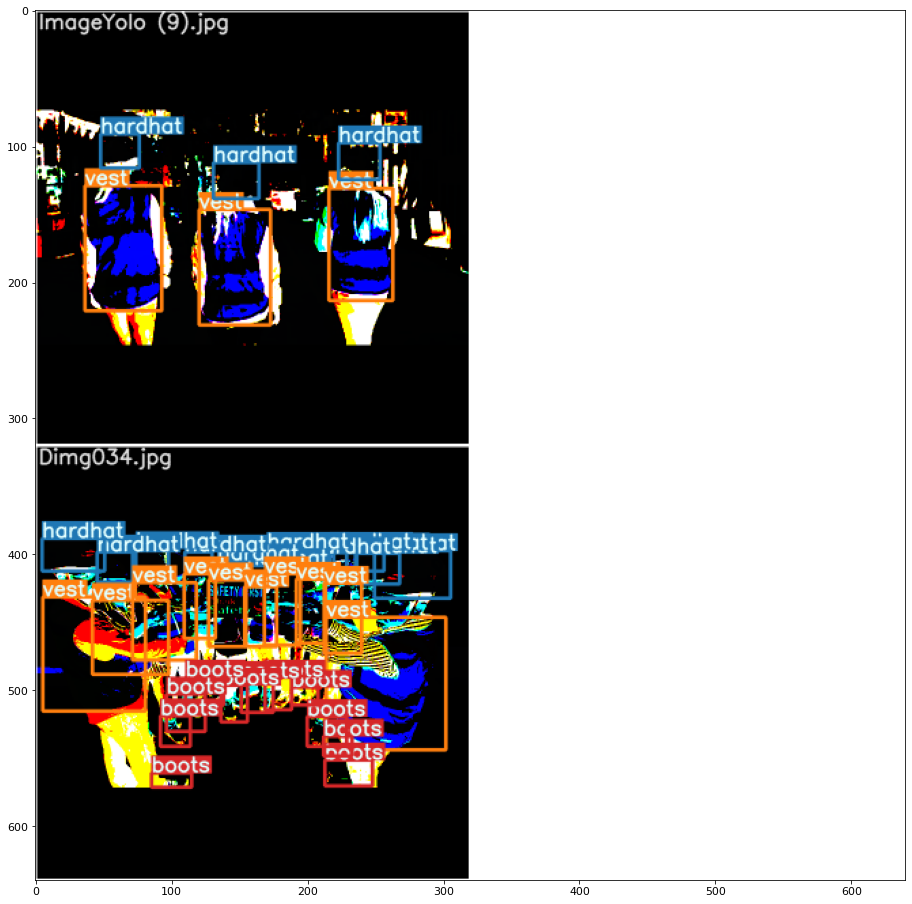

In [18]:
plt.figure(figsize=(16, 16))
plt.imshow(res)

In [5]:
yolo_data[-1]

((0.0, 114.5), (0.0, 140.5))

In [6]:
yolo_data[-3]

('data/mini/images/images70.jpg', 'data/mini/images/27bb806c8c.jpg')

## Actual input image

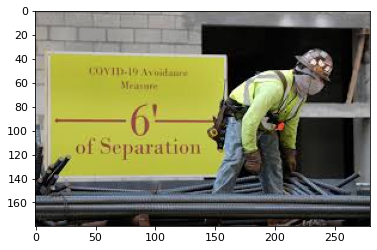

In [7]:
img = cv2.imread(yolo_data[-3][0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Input image from dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


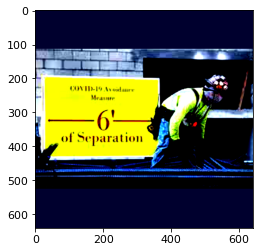

In [8]:
plt.imshow(imgs[0].permute(1, 2, 0))

## Displaying input image without padding

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


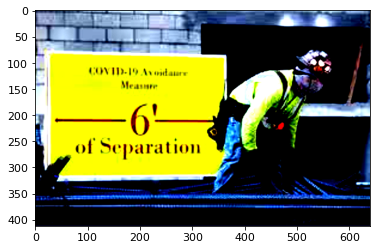

In [9]:
dw = int(yolo_data[-1][0][0])
dh = int(yolo_data[-1][0][1])

if dw == 0:
    plt.imshow(imgs[0].permute(1, 2, 0)[dh:-dh:,:,:])
else:
    plt.imshow(imgs[0].permute(1, 2, 0)[:,dw:-dw,:])

## Yolo Input image

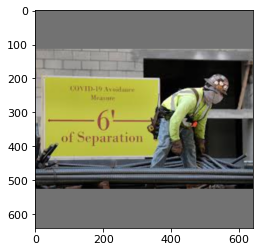

In [10]:
plt.imshow(yolo_data[0][0].permute(1, 2, 0))

## Midas input image and depth

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


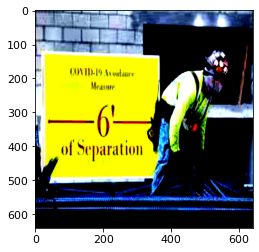

In [11]:
plt.imshow(midas_data[0][0].permute(1, 2, 0))

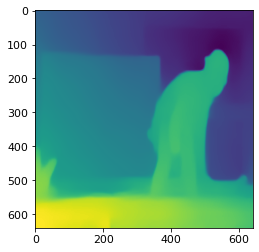

In [12]:
plt.imshow(midas_data[1][0].squeeze())

## PlaneRCNN input image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


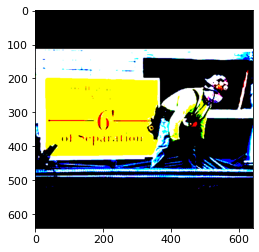

In [13]:
plt.imshow(planercnn_data[0][0][0].permute(1, 2, 0))

# PlaneRCNN Dataset

In [3]:
dataset = PlaneRCNNDataset(PlaneRCNNConfig())
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = 16,
    num_workers = 4,
    shuffle = True,
    pin_memory = True,
    collate_fn = dataset.collate_fn
)

In [4]:
stuff = next(iter(loader))

In [5]:
len(stuff)

16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


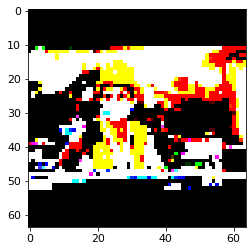

In [6]:
plt.imshow(stuff[0][0][0].permute(1, 2, 0))

In [6]:
for i in range(12):
    print(type(stuff[0][i]))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [7]:
for i in range(12):
    print(stuff[0][i].shape)

torch.Size([1, 3, 640, 640])
torch.Size([1, 16])
torch.Size([1, 102300, 1])
torch.Size([1, 256, 4])
torch.Size([1, 13])
torch.Size([1, 13, 4])
torch.Size([1, 13, 56, 56])
torch.Size([1, 13, 3])
torch.Size([1, 640, 640])
torch.Size([1, 4, 4])
torch.Size([1, 640, 640])
torch.Size([6])


# Midas dataset

In [3]:
dataset = MidasDataset(Config)
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = 2,
    num_workers = 4,
    shuffle = True,
    pin_memory = True,
    # collate_fn = dataset.collate_fn
)

In [4]:
stuff = next(iter(loader))

In [5]:
stuff[1].shape

torch.Size([2, 1, 416, 416])

In [6]:
stuff[0].shape

torch.Size([2, 3, 416, 416])

## Yolo Dataset

In [6]:
from fox.yolov3.utils.datasets import LoadImagesAndLabels
from fox.yolov3.utils.utils import plot_images, load_classes
from fox.utils import parse_data_cfg
import torch
import matplotlib.pyplot as plt
import os

In [7]:
data = parse_data_cfg("data/yolo/custom.data")
classes = load_classes(data["names"])

In [8]:
dataset = LoadImagesAndLabels(data["train"], mosiac=False, label_files_path=data["labels"])
loader = torch.utils.data.DataLoader(dataset, batch_size=16, collate_fn=dataset.collate_fn)

val_dataset = LoadImagesAndLabels(data["valid"], rect=True, mosiac=False, label_files_path=data["labels"])
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, collate_fn=val_dataset.collate_fn)

Caching labels data\yolo\labels.npy (1001 found, 0 missing, 14 empty, 0 duplicate, for 1015 images): 100%|██████████| 1015/1015 [00:00<00:00, 21146.32it/s]
Caching labels data\yolo\labels.npy (99 found, 0 missing, 0 empty, 0 duplicate, for 99 images): 100%|██████████| 99/99 [00:00<00:00, 4950.00it/s]


In [9]:
stuff = next(iter(loader))
imgs, targets, paths, shapes, pad = stuff

val_stuff = next(iter(val_loader))
val_imgs, val_targets, val_paths, val_shapes, val_pad = val_stuff

In [10]:
fname = "data/yolo_test.jpg"
if os.path.exists(fname):
    os.remove(fname)
res = plot_images(imgs, targets, paths, names=classes, fname=fname)

In [15]:
paths

('data\\images\\img_001.jpg',
 'data\\images\\img_015.jpg',
 'data\\images\\img_016.jpg',
 'data\\images\\img_020.jpg',
 'data\\images\\img_022.jpg',
 'data\\images\\img_024.jpg',
 'data\\images\\img_026.jpg',
 'data\\images\\img_027.jpg',
 'data\\images\\img_033.jpg',
 'data\\images\\img_034.jpg',
 'data\\images\\img_038.jpg',
 'data\\images\\img_043.jpg',
 'data\\images\\img_044.jpg',
 'data\\images\\img_050.jpg',
 'data\\images\\img_051.jpg',
 'data\\images\\img_056.jpg')

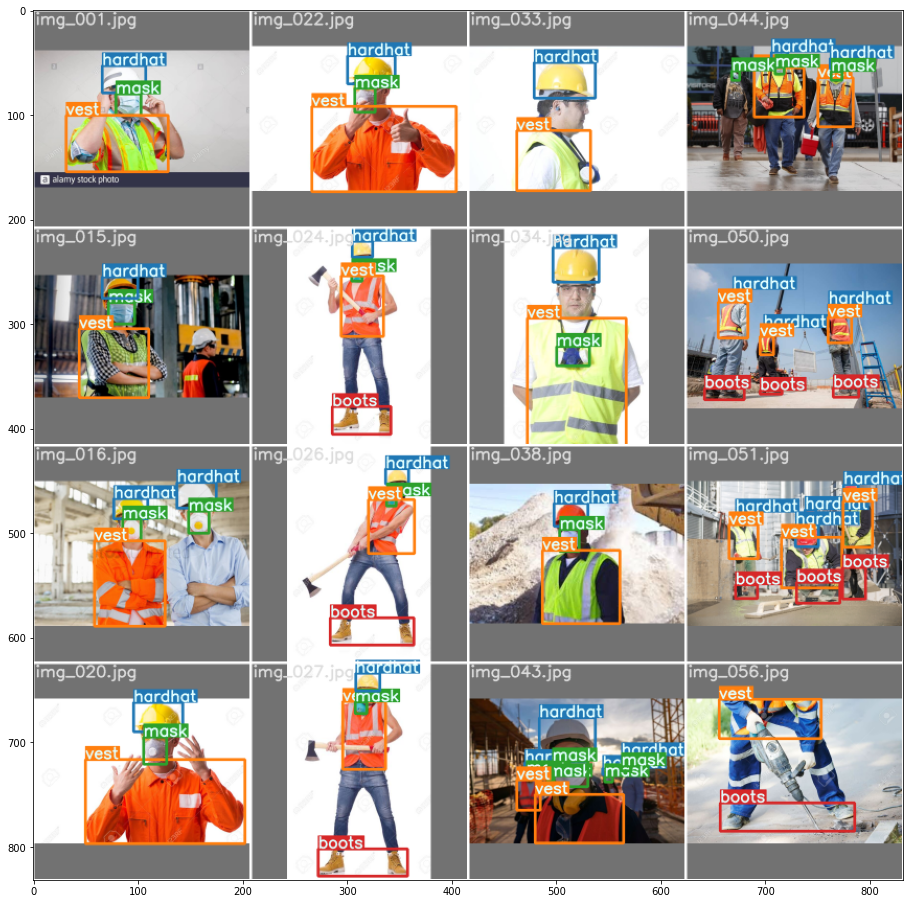

In [12]:
plt.figure(figsize=(16, 16))
plt.imshow(res)

In [13]:
fname = "data/yolo_val_test.jpg"
if os.path.exists(fname):
    os.remove(fname)
res = plot_images(val_imgs, val_targets, val_paths, names=classes, fname=fname)

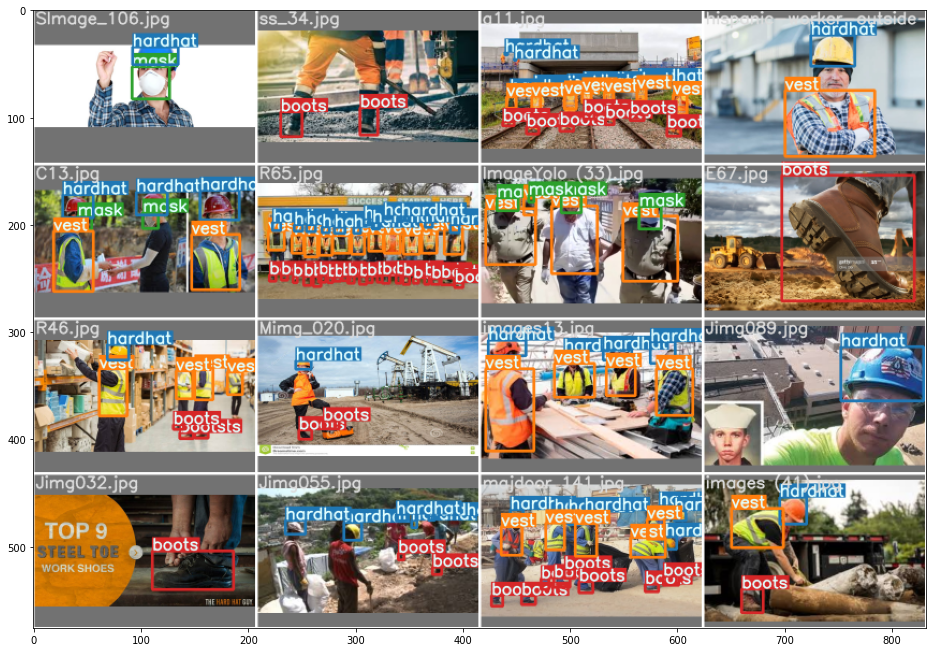

In [14]:
plt.figure(figsize=(16, 16))
plt.imshow(res)